### COVID-19 on ventilator prediction model based on Covid cases and hospitalisation


In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC  
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# Get the curent date/time
today = pd.to_datetime('today')

In [3]:
# Downloads the lates data availlable and saves it.
# Run this step dayly to update the data.

# df_Covid_data = pd.read_csv('https://covidtracking.com/data/download/national-history.csv')
# df_Covid_data.to_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')

In [4]:
# Loads the last saved data. Make sure the data is up to date by running the cell above. 
df_Covid_data = pd.read_csv('National_Covid_Data_'+today.strftime("%Y-%m-%d")+'.csv')
df_Covid_data

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,recovered,states,totalTestResults,totalTestResultsIncrease
0,0,2020-12-07,274745.0,1347,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,3328.0,7073.0,14717065,180193,5714557.0,56,205934174,1835388
1,1,2020-12-06,273398.0,1146,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,3322.0,7095.0,14536872,177801,5624609.0,56,204098786,1648306
2,2,2020-12-05,272252.0,2461,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,3321.0,7006.0,14359071,212880,5576152.0,56,202450480,2190899
3,3,2020-12-04,269791.0,2563,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,3305.0,6999.0,14146191,224831,5470389.0,56,200259581,1854869
4,4,2020-12-03,267228.0,2706,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,3280.0,6867.0,13921360,210204,5404018.0,56,198404712,1828230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,316,2020-01-26,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
317,317,2020-01-25,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
318,318,2020-01-24,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,0
319,319,2020-01-23,NaN,0,NaN,NaN,0,NaN,NaN,0,0,NaN,NaN,0,0,NaN,2,2,1


In [5]:
# Check for shape, null values and data types of the data
print("Size/Shape of the dataset",df_Covid_data.shape)
print("Checking for null values:\n",df_Covid_data.isnull().sum())
print("Checking Data-type:",df_Covid_data.dtypes)

Size/Shape of the dataset (321, 19)
Checking for null values:
 Unnamed: 0                   0
date                         0
death                       19
deathIncrease                0
inIcuCumulative             63
inIcuCurrently              64
hospitalizedIncrease         0
hospitalizedCurrently       55
hospitalizedCumulative      42
negative                     0
negativeIncrease             0
onVentilatorCumulative      70
onVentilatorCurrently       63
positive                     0
positiveIncrease             0
recovered                   63
states                       0
totalTestResults             0
totalTestResultsIncrease     0
dtype: int64
Checking Data-type: Unnamed: 0                    int64
date                         object
death                       float64
deathIncrease                 int64
inIcuCumulative             float64
inIcuCurrently              float64
hospitalizedIncrease          int64
hospitalizedCurrently       float64
hospitalizedCumulative     

In [6]:
# Print the column names
df_Covid_data.columns

Index(['Unnamed: 0', 'date', 'death', 'deathIncrease', 'inIcuCumulative',
       'inIcuCurrently', 'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [7]:
#Drop columns that are not needed for the model
df_Covid_data.drop(['Unnamed: 0','death',\
       'deathIncrease','onVentilatorCumulative','states'],1,inplace = True)

In [8]:
df_Covid_data.columns

Index(['date', 'inIcuCumulative', 'inIcuCurrently', 'hospitalizedIncrease',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'negative',
       'negativeIncrease', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'recovered', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

In [9]:
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
1,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
2,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
3,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
4,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,2020-01-26,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
317,2020-01-25,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
318,2020-01-24,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,0
319,2020-01-23,NaN,NaN,0,NaN,NaN,0,0,NaN,0,0,NaN,2,1


In [10]:
# Drop the null rows
df_Covid_data = df_Covid_data.dropna()
df_Covid_data

,date,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
0,2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
1,2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
2,2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
3,2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
4,2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
253,2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
254,2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456
255,2020-03-27,124.0,1792.0,2572,10978.0,12123.0,559423,77275,324.0,112220,19244,2418.0,735114,102115


In [11]:
# Set the date as index
df_Covid_data.set_index('date', inplace =True)
df_Covid_data

,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCurrently,positive,positiveIncrease,recovered,totalTestResults,totalTestResultsIncrease
date,,,,,,,,,,,,,
2020-12-07,32120.0,20098.0,3614,102148.0,589486.0,163378726,1386381,7073.0,14717065,180193,5714557.0,205934174,1835388
2020-12-06,31946.0,20145.0,2311,101501.0,585872.0,161992345,1175503,7095.0,14536872,177801,5624609.0,204098786,1648306
2020-12-05,31831.0,19947.0,3457,101192.0,583561.0,160816842,1530133,7006.0,14359071,212880,5576152.0,202450480,2190899
2020-12-04,31608.0,19858.0,4652,101276.0,580104.0,159286709,1260657,6999.0,14146191,224831,5470389.0,200259581,1854869
2020-12-03,31276.0,19723.0,5331,100755.0,575452.0,158026052,1238465,6867.0,13921360,210204,5404018.0,198404712,1828230
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-30,187.0,3087.0,2472,15917.0,19798.0,818231,95634,451.0,172740,21470,4560.0,1035705,116583
2020-03-29,156.0,2456.0,2794,14055.0,17326.0,722597,65412,439.0,151270,19444,4076.0,919122,83552
2020-03-28,140.0,2174.0,2409,12409.0,14532.0,657185,97762,390.0,131826,19606,3145.0,835570,100456


In [12]:
# Specified data columns to be used in the model 
X = df_Covid_data[['hospitalizedIncrease','hospitalizedCurrently','positive',\
             'positiveIncrease','recovered']]
y = df_Covid_data['onVentilatorCurrently'].values.reshape(-1,1)
y

array([[7073.],
       [7095.],
       [7006.],
       [6999.],
       [6867.],
       [6855.],
       [6649.],
       [6520.],
       [6245.],
       [6148.],
       [6030.],
       [5986.],
       [5990.],
       [5630.],
       [5458.],
       [5233.],
       [5103.],
       [5055.],
       [4859.],
       [4701.],
       [4379.],
       [4166.],
       [3939.],
       [3945.],
       [3769.],
       [3622.],
       [3367.],
       [3201.],
       [3110.],
       [2977.],
       [2947.],
       [2850.],
       [2877.],
       [2832.],
       [2733.],
       [2637.],
       [2553.],
       [2502.],
       [2477.],
       [2403.],
       [2347.],
       [2287.],
       [2301.],
       [2176.],
       [2230.],
       [2180.],
       [2147.],
       [2090.],
       [2045.],
       [1800.],
       [1762.],
       [1791.],
       [1739.],
       [1769.],
       [1776.],
       [1755.],
       [1666.],
       [1646.],
       [1667.],
       [1655.],
       [1638.],
       [1646.],
       [

In [13]:

print(X.shape, y.shape)

(257, 5) (257, 1)


## Model - LinearRegression

In [14]:
# Split the data to testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y,)


In [15]:
X_train

,hospitalizedIncrease,hospitalizedCurrently,positive,positiveIncrease,recovered
date,,,,,
2020-07-30,3279,56565.0,4454538,68806,1413102.0
2020-07-06,818,39970.0,2922991,41494,923481.0
2020-04-10,4909,53167.0,501069,33489,29015.0
2020-11-28,3404,91762.0,13055778,154522,5024447.0
2020-07-23,2378,59854.0,4008440,71225,1232403.0
...,...,...,...,...,...
2020-04-03,4603,25777.0,283923,31838,10861.0
2020-07-09,1654,44055.0,3096428,58959,968441.0
2020-07-11,5070,51982.0,3225576,62324,994923.0


In [16]:
# Choose the model
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# model.fit(X_train, y_train)

In [18]:
# print(f"Training Data Score: {model.score(X_train, y_train)}")
# print(f"Testing Data Score: {model.score(X_test, y_test)}")

In [19]:
# print('Weight coefficients:', model.coef_)
# print('y-axis intercept:', model.intercept_)

### Skaling the data using StandardScaler, and plotting a residual plot


In [20]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [21]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [22]:
# X_train = X_scaler.inverse_transform(X_train_scaled)
# X_train

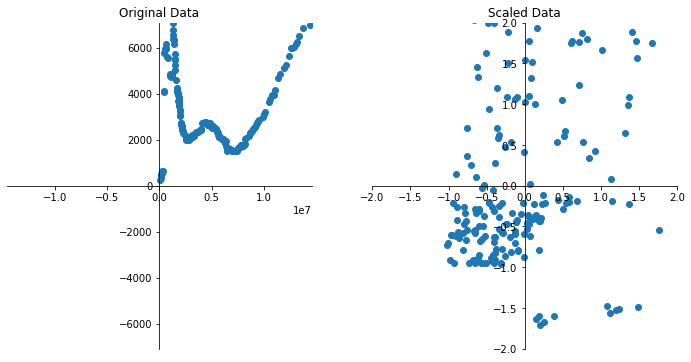

In [23]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["positive"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["positive"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

###  Fit the Model to the scaled training data and make predictions using the scaled test data

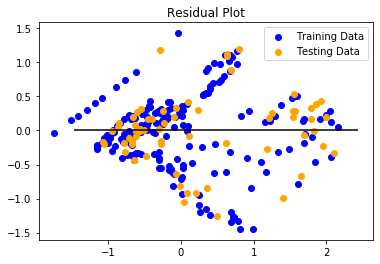

In [24]:
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [25]:
print(f"Training scaled Data Score: {model.score(X_train_scaled, y_train_scaled)}")
print(f"Testing scaled Data Score: {model.score(X_test_scaled, y_test_scaled)}")
print('Weight coefficients:', model.coef_)
print('y-axis intercept:', model.intercept_)


Training scaled Data Score: 0.7017854014466769
Testing scaled Data Score: 0.7677113738583995
Weight coefficients: [[-0.01309324  1.48777215 -4.10134187 -0.60488858  3.84518292]]
y-axis intercept: [5.92793666e-16]


## Quantify the model using scaled data

In [26]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.254452323564488, R2: 0.7677113738583995


In [27]:
X_scaled = X_scaler.transform(X)
predictions = model.predict(X_scaled)
print(f"True output:{y[0]}")
print(f"Predicted output:{y_scaler.inverse_transform(predictions[0]).round(2)}") 
print(f"Prediction Error:{y_scaler.inverse_transform(predictions[0]).round(2)-y[0]}") 

True output:[7073.]
Predicted output:[6523.88]
Prediction Error:[-549.12]


In [28]:
predicted_y = y_scaler.inverse_transform(predictions).round(2)
predicted_y.reshape(1,-1).tolist()[0]


[6523.88,
 6461.23,
 5710.03,
 5375.93,
 5773.58,
 6098.31,
 6284.91,
 6613.6,
 6454.5,
 5848.45,
 4640.68,
 6354.75,
 4999.28,
 4880.12,
 5012.12,
 4559.52,
 4090.96,
 3659.78,
 3821.69,
 4175.33,
 4079.74,
 3839.18,
 3540.94,
 3101.31,
 2838.55,
 3253.2,
 3244.77,
 3195.88,
 3214.49,
 3117.9,
 2617.43,
 2604.08,
 2732.74,
 2906.3,
 3093.19,
 3013.59,
 3025.72,
 2652.24,
 2429.14,
 2619.35,
 2720.69,
 2783.27,
 2838.09,
 2592.73,
 2234.59,
 2041.18,
 2416.85,
 2607.28,
 2471.95,
 2373.22,
 2335.88,
 2279.61,
 2028.49,
 2175.87,
 2331.74,
 2343.89,
 2368.2,
 2154.81,
 1936.75,
 1993.83,
 1980.19,
 1979.93,
 2062.56,
 1879.9,
 1665.14,
 1387.8,
 1508.83,
 1639.02,
 1679.08,
 1769.91,
 1652.22,
 1612.78,
 1326.42,
 1165.61,
 1505.99,
 1518.02,
 1177.46,
 1275.84,
 1307.12,
 1161.66,
 1168.0,
 1322.81,
 1465.44,
 1544.82,
 1517.19,
 1433.98,
 1383.45,
 1409.45,
 1745.17,
 1899.86,
 2018.65,
 1786.35,
 1705.7,
 1581.1,
 1505.72,
 1766.98,
 2165.6,
 1763.29,
 2053.42,
 1848.27,
 1847.69,
 1

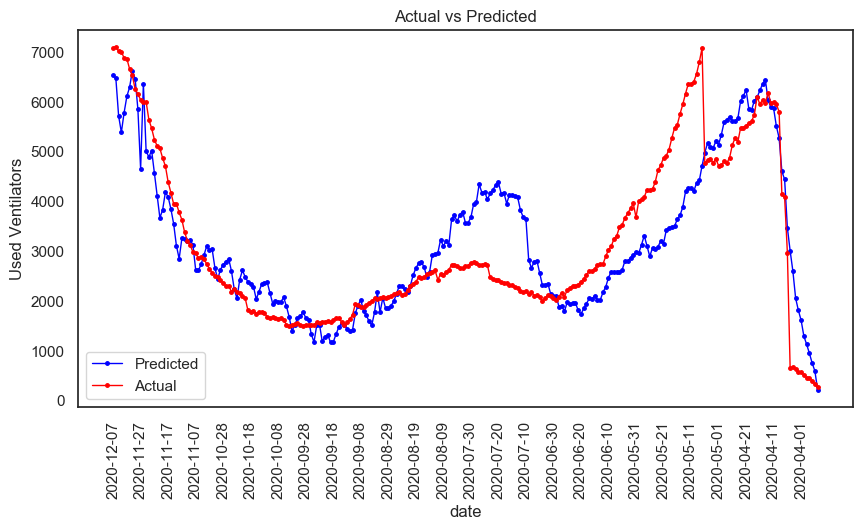

In [29]:
sns.set(style='white')

plt.figure(figsize=(10, 5), dpi=100)
plt.plot(df_Covid_data.index, predicted_y, label="Predicted", linewidth=1, marker='.', markersize=5, color='blue')
plt.plot(df_Covid_data.index, df_Covid_data['onVentilatorCurrently'], label="Actual", linewidth=1, marker='.', markersize=5, color='red')
# plt.plot(dc.index, dc["Error"], label="Error", linewidth=1, marker='.', markersize=10, color='green')


plt.xticks(df_Covid_data.index[::10], rotation=90)
plt.title('Actual vs Predicted')
plt.xlabel('date')
plt.ylabel('Used Ventilators')

plt.legend()
#plt.savefig('covid_outbreak.png', dpi=100)
plt.show()